<a href="https://colab.research.google.com/github/jiwonlee-0218/colab/blob/main/Early_Stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Early Stopping

------

In [ ]:
import random
import numpy as np
import os
import tensorflow as tf

In [ ]:
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(seed)
    
seed_everything()

# 0 .기존 작업

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x, y), (x_test, y_test) = fashion_mnist.load_data()


from tensorflow.keras.utils import to_categorical

x = x.astype('float32') 
x_test = x_test.astype('float32')

x /= 255
x_test /= 255

y = to_categorical(y, 10)
y_test = to_categorical(y_test, 10)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(64, 'relu'))
    model.add(Dense(128, 'relu'))
    model.add(Dense(units=10, activation='softmax'))
    
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                 metrics=['accuracy'])

    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 36,842
Trainable params: 36,842
Non-trainable params: 0
_________________________________________________________________


---

# 1. callback 만들기

https://keras.io/callbacks/#earlystopping

- monitor: early stopping을 결정하는 기준
- min_delta: 이거보다 변화가 작으면 멈춘다.
- patience: 이 숫자의 epoch만큼 변하지 개선(감소)되지 않으면 멈춘다. (2로 설정시, 2연속 val_loss가 증가하면 train 중지)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

In [ ]:
model = create_model()

history = model.fit(x, y,  epochs = 20, validation_split = 1/6,callbacks = [es], batch_size= 512)

Epoch 1/20
98/98 [==============================] - 3s 20ms/step - loss: 1.3961 - accuracy: 0.4985 - val_loss: 0.5467 - val_accuracy: 0.8097
Epoch 2/20
98/98 [==============================] - 1s 6ms/step - loss: 0.5077 - accuracy: 0.8226 - val_loss: 0.4804 - val_accuracy: 0.8275
Epoch 3/20
98/98 [==============================] - 1s 7ms/step - loss: 0.4391 - accuracy: 0.8457 - val_loss: 0.4312 - val_accuracy: 0.8531
Epoch 4/20
98/98 [==============================] - 1s 7ms/step - loss: 0.4102 - accuracy: 0.8552 - val_loss: 0.4174 - val_accuracy: 0.8523
Epoch 5/20
98/98 [==============================] - 1s 5ms/step - loss: 0.3911 - accuracy: 0.8606 - val_loss: 0.4003 - val_accuracy: 0.8559
Epoch 6/20
98/98 [==============================] - 1s 6ms/step - loss: 0.3656 - accuracy: 0.8688 - val_loss: 0.3777 - val_accuracy: 0.8655
Epoch 7/20
98/98 [==============================] - 1s 6ms/step - loss: 0.3461 - accuracy: 0.8757 - val_loss: 0.3821 - val_accuracy: 0.8629
Epoch 8/20
98/98 [=

In [ ]:
model = create_model()

history = model.fit(x, y,  epochs = 20, validation_split = 1/6,callbacks = [es], batch_size= 512)

Epoch 1/20
98/98 [==============================] - 1s 7ms/step - loss: 1.3897 - accuracy: 0.5296 - val_loss: 0.5509 - val_accuracy: 0.8002
Epoch 2/20
98/98 [==============================] - 1s 5ms/step - loss: 0.4952 - accuracy: 0.8257 - val_loss: 0.4879 - val_accuracy: 0.8197
Epoch 3/20
98/98 [==============================] - 1s 6ms/step - loss: 0.4413 - accuracy: 0.8453 - val_loss: 0.4423 - val_accuracy: 0.8489
Epoch 4/20
98/98 [==============================] - 1s 6ms/step - loss: 0.4108 - accuracy: 0.8547 - val_loss: 0.4170 - val_accuracy: 0.8541
Epoch 5/20
98/98 [==============================] - 1s 6ms/step - loss: 0.3939 - accuracy: 0.8619 - val_loss: 0.3992 - val_accuracy: 0.8583
Epoch 6/20
98/98 [==============================] - 1s 6ms/step - loss: 0.3677 - accuracy: 0.8708 - val_loss: 0.3766 - val_accuracy: 0.8678
Epoch 7/20
98/98 [==============================] - 1s 6ms/step - loss: 0.3491 - accuracy: 0.8789 - val_loss: 0.3772 - val_accuracy: 0.8666
Epoch 8/20
98/98 [==

In [ ]:
import matplotlib.pyplot as plt

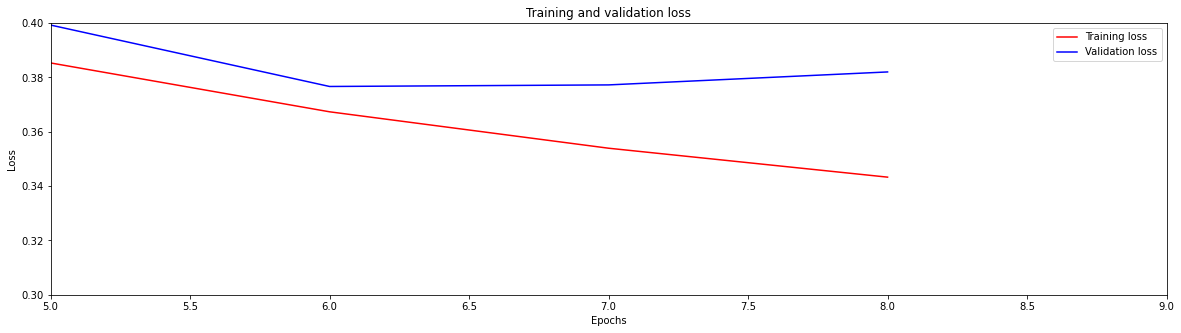

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20,5))
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() 
plt.xlim(5,9)
plt.ylim(0.3,0.4)

plt.show()